In [7]:
#%pip install pandas
#%pip install matplotlib


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2024/main/TP_Spotify/StreamingHistory_Extended.csv"
archivo = "StreamingHistory_Extended.csv"
spoty : pd.DataFrame = pd.read_csv(archivo)
spoty

C:\Users\48590054\AppData\Local\Temp\ipykernel_14692\2368300940.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  spoty : pd.DataFrame = pd.read_csv(archivo)


,ts,username,platform,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,is_podcast
0,2020-12-06T02:51:11Z,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,unknown,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1607222710755,False
1,2020-12-06T02:53:31Z,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,unknown,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223071185,False
2,2020-12-06T02:53:53Z,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,unknown,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223210387,False
3,2020-12-06T02:53:56Z,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,unknown,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223233165,False
4,2020-12-06T02:53:57Z,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,unknown,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223236453,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125344,2018-10-05T22:44:53Z,11145402699,"iOS 12.0 (iPhone8,1)",1365,AR,unknown,Gente Que No Sabe Lo Que Quiere,Litto Nebbia,Solo Se Trata de Vivir / Solopiano Vol. 1,spotify:track:3u8sP95YHOsYwRQfms6kgc,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779491211,False
125345,2018-10-05T22:44:54Z,11145402699,"iOS 12.0 (iPhone8,1)",1344,AR,unknown,11 Y 6,Fito Paez,Giros,spotify:track:2PkTjm1QAJCZbJ9MqC4RqA,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779492740,False
125346,2018-10-05T22:44:55Z,11145402699,"iOS 12.0 (iPhone8,1)",832,AR,unknown,Mientes,Charly García,Tango 4,spotify:track:670dXRMKr9vVtGk01dYeSr,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779494205,False
125347,2018-10-05T22:44:56Z,11145402699,"iOS 12.0 (iPhone8,1)",1194,AR,unknown,Apostar al Amor,Los Tipitos,Push,spotify:track:6PyBNCpOX5uOjKDNjNNgjq,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779495059,False


In [10]:
#  1.
# ¿Que información contiene el dataset? Describir las columnas y los tipos de datos.
# Pista: ¿Son todas las columnas necesarias para el análisis? ¿Son todos los registros del mismo tipo?

spoty.info()

# spoty.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125349 entries, 0 to 125348
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 125349 non-null  object
 1   username                           125349 non-null  int64 
 2   platform                           125349 non-null  object
 3   ms_played                          125349 non-null  int64 
 4   conn_country                       125349 non-null  object
 5   user_agent_decrypted               104897 non-null  object
 6   master_metadata_track_name         123953 non-null  object
 7   master_metadata_album_artist_name  123953 non-null  object
 8   master_metadata_album_album_name   123953 non-null  object
 9   spotify_track_uri                  123953 non-null  object
 10  episode_name                       168 non-null     object
 11  episode_show_name                  168 non-null     

In [11]:
#  2.
# ¿A partir de que fecha se registraron las reproducciones? ¿Hasta que fecha?

fecha_rep = pd.to_datetime( spoty["ts"] )

print("Se registran reproducciones desde", fecha_rep.min() , "hasta", fecha_rep.max())



Se registran reproducciones desde 2014-06-27 18:01:15+00:00 hasta 2024-05-23 23:56:20+00:00


In [12]:
#  3.
# ¿Cuántas canciones diferentes se escucharon en total?

# nombre_group = spoty.groupby("spotify_track_uri")

# len (nombre_group)


spoty['spotify_track_uri'].nunique()

11556

In [13]:
#  4.
# ¿Cuánto es la duración total de las reproducciones de canciones registradas?
# Pista: ¿Alguna columna del dataset indica la duración de la reproducción?

nombre_group = spoty.groupby("spotify_track_uri")
T_rep =  nombre_group['ms_played'].sum()/60000
T_rep

spotify_track_uri
spotify:track:001b8XFtRhhFrMbWROVgO4    5.142217
spotify:track:008YILXYfsMa2KuPY8bBtl    2.832267
spotify:track:009s8MccQSXM4pAQwsP59s    0.072883
spotify:track:00DiMUseXsW3L8eR8G8xOa    0.034633
spotify:track:00GOPLxW4PGQuUYdPJh8K1    3.023433
                                          ...   
spotify:track:7zoQhAYWNKRyARI7xPnJW1    0.566583
spotify:track:7zrpoAJte9o12TzawqgdD0    0.007933
spotify:track:7zsgBOY20sX0Z8L4RTdU3Y    0.611650
spotify:track:7zvKFw17XyoBUx9mHiwzPy    5.505983
spotify:track:7zx1i0jGcFwMBurajgKlO7    0.040883
Name: ms_played, Length: 11556, dtype: float64

In [14]:
#  5. 
# ¿Cuál es el artista más escuchado por tiempo total de reproducción?

art_group = spoty.groupby ('master_metadata_album_artist_name')
T_art_group = art_group['ms_played'].sum().sort_values (ascending=False).head(1)
T_art_group.index[0]

'Charly García'

In [15]:
#  6.
# ¿Cuál es la canción más escuchada por tiempo total de reproducción?

#can_group = spoty [['master_metadata_album_artist_name','ms_played', 'master_metadata_track_name', 'spotify_track_uri']]

can_group = spoty.groupby('spotify_track_uri').agg({'ms_played': 'sum','master_metadata_track_name': 'unique', 'master_metadata_album_artist_name' : 'unique'})

display (can_group.sort_values(by= 'ms_played', ascending=False).head(1))


,ms_played,master_metadata_track_name,master_metadata_album_artist_name
spotify_track_uri,,,
spotify:track:0wXuerDYiBnERgIpbb3JBR,56637046,[Redbone],[Childish Gambino]


In [16]:
#  7.
# Del artista más escuchado (por tiempo reproducido), ¿cuál es la canción más escuchada?

art_group = spoty.groupby ('master_metadata_album_artist_name')['ms_played'].sum().sort_values (ascending=False).head(1)

art_mas_escuchado = art_group.index[0]

canciones_artista = spoty[spoty['master_metadata_album_artist_name'] == art_mas_escuchado]

cancion_mas_escuchada = canciones_artista.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(1)

print ("La canción más escuchada del artista más escuchado (",art_mas_escuchado,") es",cancion_mas_escuchada.index[0])



La canción más escuchada del artista más escuchado ( Charly García ) es Hablando a Tu Corazón


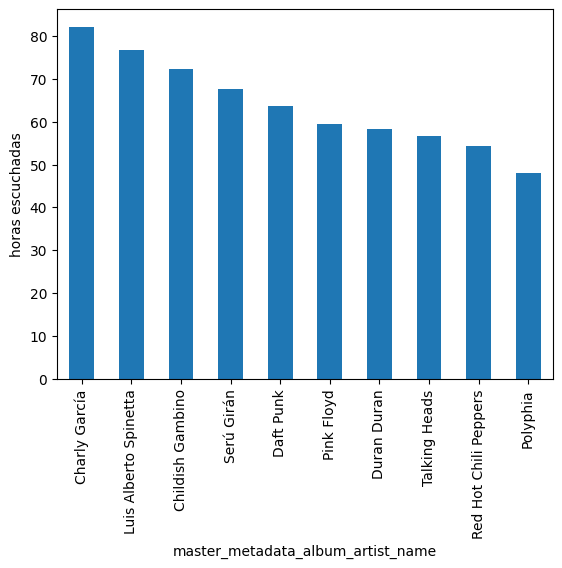

In [17]:
#  8.
# Determinar el top 10 de artistas más escuchados . Elegir un tipo de gráfico adecuado para visualizar los resultados.

art_group = spoty.groupby ('master_metadata_album_artist_name')['ms_played'].sum()/3600000

art_group_top = art_group.sort_values(ascending=False).head(10)

my_plot = art_group_top.plot(kind='bar').set_ylabel('horas escuchadas')



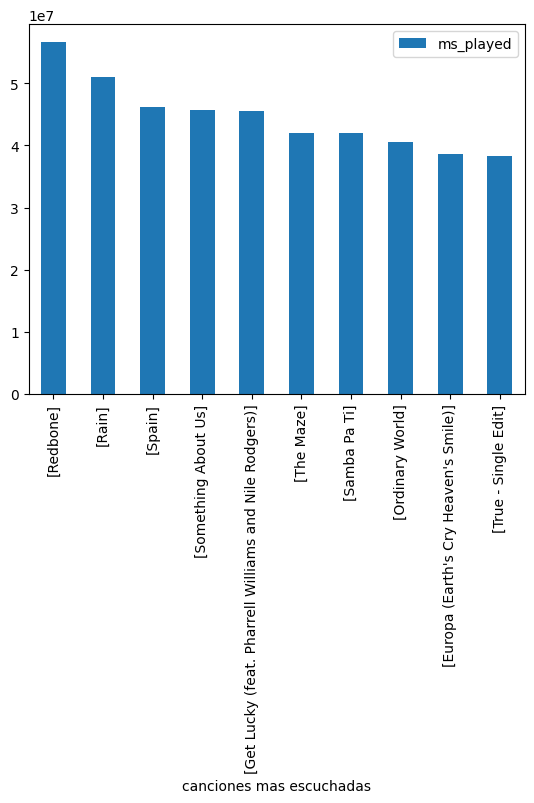

In [18]:
#  9.
# Determinar el top 10 de canciones más escuchadas. Elegir un tipo de gráfico adecuado para visualizar los resultados.

can_group = spoty.groupby('spotify_track_uri').agg({'ms_played': 'sum','master_metadata_track_name': 'unique', 'master_metadata_album_artist_name' : 'unique'})

top_10 = can_group.sort_values(by= 'ms_played', ascending=False).head(10)

my_plot = top_10.plot(kind='bar', x='master_metadata_track_name', xlabel='canciones mas escuchadas', y='ms_played')


# Ademas, se deben plantear al menos 3 preguntas adicionales y responderlas utilizando el dataset.

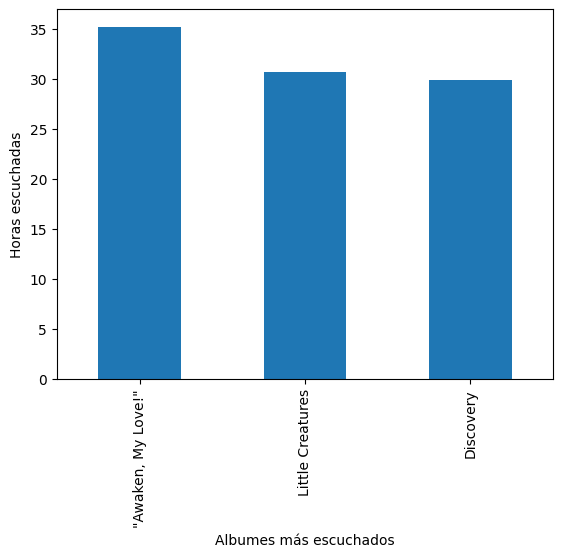

In [19]:
#  Ejercicio propio 1 - top 3 de albums mas escuchados y graficarlos:

album_group = spoty.groupby('master_metadata_album_album_name')['ms_played'].sum()/3600000

top_3_album = album_group.sort_values(ascending=False).head(3)

plot = top_3_album.plot(kind='bar',xlabel='Albumes más escuchados',ylabel='Horas escuchadas')


In [20]:
#  ejercicio propio 2 - en que dispositivo se escucho mas canciones 

plat_esc = spoty.groupby('platform')['ms_played'].sum()/3600000

plat_esc.sort_values(ascending=False).head(1)


platform
iOS 11.0 (iPhone8,1)    699.431412
Name: ms_played, dtype: float64

In [21]:
#  ejercicio propio 3 - cuantos minutos se escucho al artista mas escuchado

art_group = spoty.groupby ('master_metadata_album_artist_name')['ms_played'].sum()/60000
art_mas_esc = art_group.sort_values (ascending=False).head(1)

#T_art_mas_esc= spoty[spoty['master_metadata_album_artist_name'] == art_mas_esc]

print("Al artista más escuchado (",art_mas_esc.index[0],") se lo escuchó", art_mas_esc.values[0],"minutos")


Al artista más escuchado ( Charly García ) se lo escuchó 4922.073016666666 minutos


In [34]:
#Cuales son las 10 canciones de Taylor Swift mas es
TY = spoty[spoty["master_metadata_album_artist_name"].str.contains("Taylor") == True]

TY.groupby(['spotify_track_uri', "master_metadata_track_name"])['ms_played'].sum().sort_values(ascending=False).head(10)

spotify_track_uri                     master_metadata_track_name                
spotify:track:1u8c2t2Cy7UBoG4ArRcF5g  Blank Space                                   473436
spotify:track:6FB3v4YcR57y4tXFcdxI1E  I Knew You Were Trouble.                      451611
spotify:track:6RjKVXi31fui9m4dbiGRrL  I Knew You Were Trouble                       440574
spotify:track:3lKZf71jeNi14udIFPJ29V  I Knew You Were Trouble.                      439440
spotify:track:1zU8j1x3yi9xalMF96pzKp  Dear John (Taylor's Version)                  313799
spotify:track:0cqRj7pUJDkTCEsJkx8snD  Shake It Off                                  249111
spotify:track:6AtZLIzUINvExIUy4QhdjP  I Knew You Were Trouble (Taylor's Version)    219760
spotify:track:6xsEAm6w9oMQYYg3jkEkMT  Bad Blood                                     200106
spotify:track:3RauEVgRgj1IuWdJ9fDs70  The Man                                       196029
spotify:track:1F6oGPF75u9RuHH4BGx9Bf  We Are Never Ever Getting Back Together       194202
Name: ms_